## Load fill and beam modes

In [15]:
%pylab notebook
import pytimber
import datetime
import pickle
import pagestore
import time

Populating the interactive namespace from numpy and matplotlib


In [27]:
filln=4855
db=pagestore.PageStore('lhc.db','/home/nbiancac/HDD/MD/LHC/')    

ts1=mdb.getLHCFillData(fill_number=filln)['startTime']
ts2=mdb.getLHCFillData(fill_number=filln)['endTime']

print 'ts1 = '+time.strftime("%b %d %Y %H:%M:%S", time.localtime(ts1))
print 'ts2 = '+time.strftime("%b %d %Y %H:%M:%S", time.localtime(ts2))

ts1 = Apr 23 2016 19:37:45
ts2 = Apr 23 2016 22:59:32


In [28]:
mdb=pytimber.LoggingDB(source='mdb')

output_path='/home/nbiancac/HDD/MD/LHC/2016/'
tag='TCSG_6.5s_scan'

beam=1

# ts1 = '2016-04-23 21:05:00' # start time
# ts2 = '2016-04-23 21:40:00' # end time

In [29]:
# BCT
import LHC_BCT

data=mdb.get(LHC_BCT.variable_list(beams=[1,2]),ts1,ts2)
# pickle.dump( data, open( output_path+"BCT"+tag+"_B%d.pkl"%beam, "wb" ) )
# data = pickle.load( open( output_path+"BCT"+tag+"_B%d.pkl"%beam, "rb" ) )
db.store(data)

BCT=LHC_BCT.BCT(data,beam=beam)

Rebalance LHC.BCTDC.A6R4.B1:BEAM_INTENSITY
Merging 2 pages
Rebalance LHC.BCTDC.A6R4.B2:BEAM_INTENSITY


In [31]:
# BBQ

import LHC_BBQ

LHC_BBQ.BBQ

Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:EIGEN_X_AMPL_2
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:EIGEN_X_AMPL_1
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:FFT_DATA_V
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:TUNE_V
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:EIGEN_FREQ_2
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:FFT_DATA_H
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:EIGEN_FREQ_1
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:TUNE_H
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:EIGEN_AMPL_2
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:EIGEN_WIDTH_2
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:EIGEN_WIDTH_1
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:EIGEN_AMPL_1


<IPython.core.display.Javascript object>


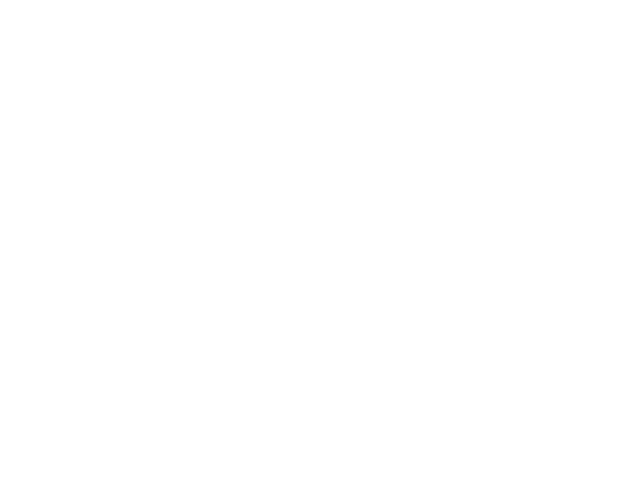

In [8]:
data=mdb.get(LHC_BBQ.variable_list(beams=[1,2]),ts1,ts2)
# pickle.dump( data, open( output_path+"BBQ"+tag+"_B%d.pkl"%beam, "wb" ) )
# data = pickle.load( open( output_path+"BBQ"+tag+"_B%d.pkl"%beam, "rb" ) )
db.store(data)
BBQ=LHC_BBQ.BBQ(data,beam=beam)


figure()
plot(BBQ.t_str, BBQ.amp_1, "-k")
plot(BBQ.t_str, BBQ.amp_2, "-r")
xlabel("Time")
ylabel("BBQ amp1")
title('B%d'%(BBQ.beam))
legend(['amp1','amp2'])
xfmt = mpl.dates.DateFormatter('%H:%M:%S')
gca().xaxis.set_major_formatter(xfmt)

Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:EIGEN_X_AMPL_2
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:EIGEN_X_AMPL_1
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:FFT_DATA_V
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:TUNE_V
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:EIGEN_FREQ_2
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:FFT_DATA_H
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:EIGEN_FREQ_1
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:TUNE_H
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:EIGEN_AMPL_2
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:EIGEN_WIDTH_2
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:EIGEN_WIDTH_1
Rebalance LHC.BQBBQ.CONTINUOUS_HS.B1:EIGEN_AMPL_1


<IPython.core.display.Javascript object>


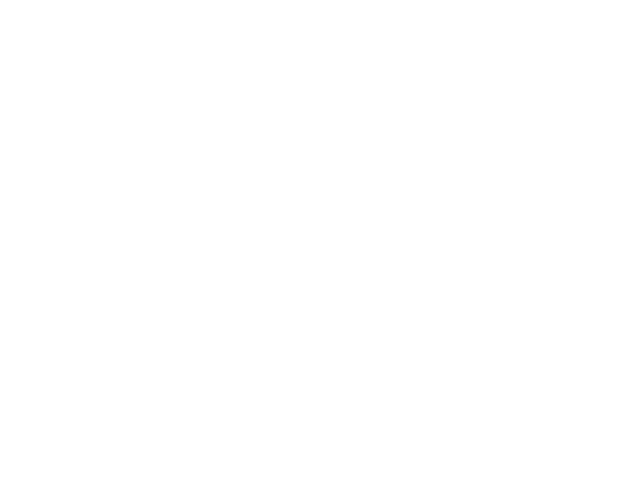

<IPython.core.display.Javascript object>


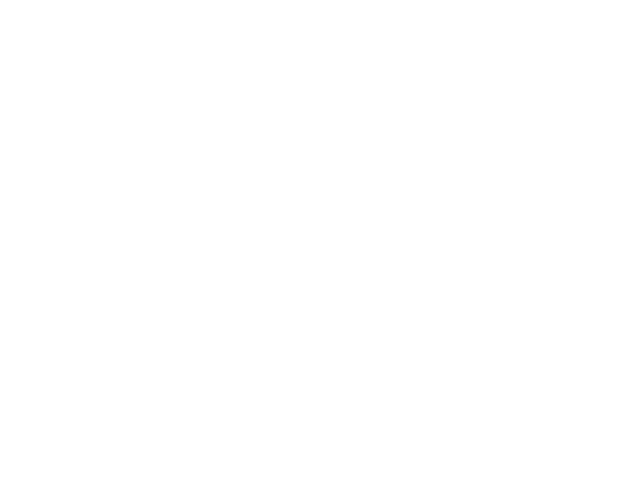

(0.25, 0.35)

In [9]:
# BBQ FFT
import LHC_BBQ

# BBQ
data=mdb.get(LHC_BBQ.variable_list(beams=[beam]),ts1,ts2)
# data = pickle.load( open( output_path+"BBQ"+tag+"_B%d.pkl"%beam, "rb" ) )
db.store(data)

BBQ_FFT=LHC_BBQ.BBQ_FFT(data,beam=beam)


figure()
plot( (BBQ_FFT.fft_h[0]), "-" )
plot( (BBQ_FFT.fft_v[0]), "-r" )
title(BBQ_FFT.t_str[0])

# Waterfall
figure()
mindate = mpl.dates.date2num(BBQ_FFT.t_str[0])
maxdate = mpl.dates.date2num(BBQ_FFT.t_str[-1])
img = plt.imshow(BBQ_FFT.fft_v, origin='lower', cmap='jet', interpolation='nearest', aspect='auto',
                extent=(0, 0.5, mindate, maxdate))

hfmt = DateFormatter('%H:%M:%S')
gca().yaxis.set_major_formatter(hfmt)

title('B%d BBQ-FFT: '%BBQ_FFT.beam +
    str(BBQ_FFT.t_str[0].strftime('%d/%m/%y %H:%M:%S')) +'->'+
      str(BBQ_FFT.t_str[-1].strftime('%d/%m/%y %H:%M:%S')))

xlim(0.25, 0.35)

In [10]:
# RAW BBQ
import LHC_BBQ
reload(LHC_BBQ)

data=mdb.get(LHC_BBQ.variable_list_RAW(beams=[beam]),ts1,ts2)
# pickle.dump( data, open( output_path+"BBQ_RAW"+tag+"_B%d.pkl"%beam, "wb" ) )
# data = pickle.load( open( output_path+"BBQ_RAW"+tag+"_B%d.pkl"%beam, "rb" ) )
db.store(data)

BBQ_RAW=LHC_BBQ.BBQ_RAW(data,beam=beam)

figure()
plot((BBQ_RAW.HS_h[0]), "-" )

KeyboardInterrupt: 

In [ ]:
# Collimators

import LHC_Coll
reload(LHC_Coll)

data=mdb.get(LHC_Coll.variable_list(beam),ts1,ts2)
# pickle.dump( data, open( output_path+"Coll"+tag+"_B%d.pkl"%beam, "wb" ) )
# data = pickle.load( open( output_path+"Coll"+tag+"_B%d.pkl"%beam, "rb" ) )
db.store(data)

TDI2=LHC_Coll.Coll(data,beam=beam)
TDI2.select_coll('TDI.4L2:MEAS_LVDT_GU')

figure()
plot(TDI2.t_str, TDI2.values, "-b")
xlabel("Time")
ylabel("Collimator gap")
title('B%d'%(TDI2.beam))
xfmt = mpl.dates.DateFormatter('%H:%M')
gca().xaxis.set_major_formatter(xfmt)

In [20]:
# fig, ax1 = plt.subplots()
# t = np.arange(0.01, 10.0, 0.01)
# s1 = np.exp(t)
# ax1.plot(TDI2.t_str, TDI2.values, 'b-')
# ax1.set_xlabel('time')
# # Make the y-axis label and tick labels match the line color.
# ax1.set_ylabel('TDI', color='b')
# for tl in ax1.get_yticklabels():
#     tl.set_color('b')
# xfmt = mpl.dates.DateFormatter('%H:%M')
# ax1.xaxis.set_major_formatter(xfmt)

# ax2 = ax1.twinx()
# ax2.plot(BBQ.t_str, BBQ.qv, 'k.')
# ax2.set_ylabel('BBQ', color='k')
# for tl in ax2.get_yticklabels():
#     tl.set_color('k')

### Clean uncorrelated noise with SVD cut

<IPython.core.display.Javascript object>


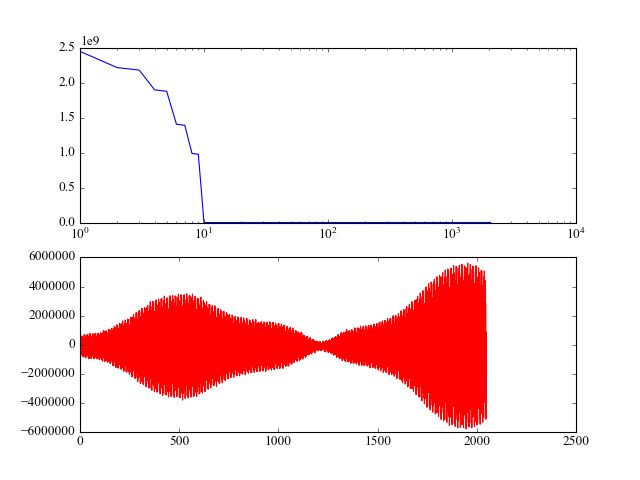

In [22]:
U, s, V = np.linalg.svd(BBQ_RAW.HS_v, full_matrices=False)
s[10:-1]=0
BBQ_RAW.HS_v=np.dot(U,np.dot(np.diag(s),V))

U, s, V = np.linalg.svd(BBQ_RAW.HS_h, full_matrices=False)
s[10:-1]=0
BBQ_RAW.HS_h=np.dot(U,np.dot(np.diag(s),V))

figure()
subplot(2,1,1)
semilogx(s)

subplot(2,1,2)
plot(BBQ_RAW.HS_v[0],'-r')



###  Sussix

In [23]:
import PySUSSIX as ps

# Sussix it!
tuney_vec=[];tunex_vec=[];
for ii in np.arange(0,len(BBQ_RAW.HS_v)):
    datax=BBQ_RAW.HS_h[ii]
    datay=BBQ_RAW.HS_v[ii]
    spec=ps.Sussix()
    spec.sussix_inp(nt1=1,nt2=2048,tunex=0.275,tuney=0.32,ex=5e-3,ey=5e-3,ir=1,nharm=5)
    spec.sussix(datax,0*datax, 
                datay, 0*datay, 
                0*datax, 0*datay)
    tuney=spec.oy[spec.ay.argmax()]
    tunex=spec.ox[spec.ax.argmax()]
    tunex_vec.append(np.abs(tunex))
    tuney_vec.append(np.abs(tuney))

BBQ_RAW.qh=np.array(tunex_vec)
BBQ_RAW.qv=np.array(tuney_vec)

# plot RAW and spectrum    
# figure()
# subplot(2,2,1)
# plot(BBQ_RAW.HS_h[0])
# spec.ax=spec.ax[spec.ox.argsort()]
# spec.ox.sort()
# subplot(2,2,2)
# stem(spec.ox,spec.ax,'.k')
# xlim(0.2 ,0.3)

# subplot(2,2,3)
# plot(BBQ_RAW.HS_v[0])
# spec.ay=spec.ay[spec.oy.argsort()]
# spec.oy.sort()
# subplot(2,2,4)
# stem(spec.oy,spec.ay,'.k')
# xlim(0.2 ,0.4)

# # plot tunes
# figure()
# subplot(2,1,1)
# plot(BBQ_RAW.qh)
# ylabel('Qx')
# ylim(0.2 ,0.3)
# subplot(2,1,2)
# plot(BBQ_RAW.qv)
# ylabel('Qy')
# ylim(0.3 ,0.32)

In [43]:
# fig, ax1 = plt.subplots()
# ax1.plot(TDI2.t_str, TDI2.values, 'b-')
# ax1.set_xlabel('time')
# ax1.set_ylabel('TDI full gap [mm]', color='b')
# for tl in ax1.get_yticklabels():
#     tl.set_color('b')
# xfmt = mpl.dates.DateFormatter('%H:%M')
# ax1.xaxis.set_major_formatter(xfmt)

# ax2 = ax1.twinx()
# ax2.plot(BBQ.t_str, BBQ.qv, 'ok',alpha=0.2,markerfacecolor='k',markeredgecolor='k')
# ax2.plot(BBQ_RAW.t_str, BBQ_RAW.qv,  'or',alpha=0.2,markerfacecolor='r',markeredgecolor='r')
# ax2.set_ylabel('Tune', color='k')
# for tl in ax2.get_yticklabels():
#     tl.set_color('k')
# ylim(0.305, 0.312)

### Moving average

<IPython.core.display.Javascript object>


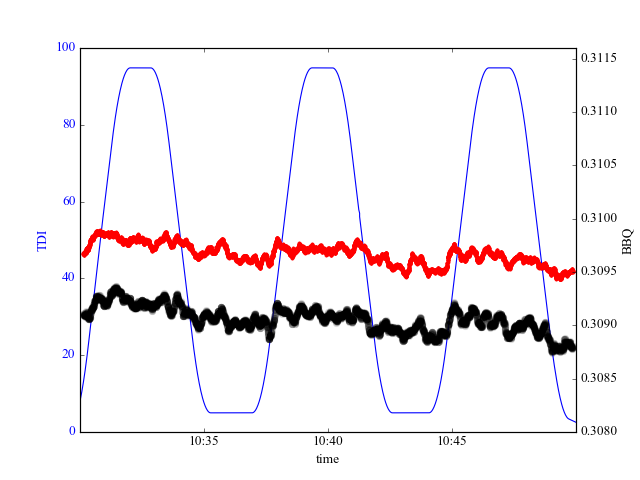

(0.308, 0.3116)

In [24]:
N=100;

BBQ_RAW.qv=np.convolve(np.ravel(BBQ_RAW.qv), np.ones((N,))/N,mode='same')
BBQ.qv=np.convolve(np.ravel(BBQ.qv), np.ones((N,))/N,mode='same')
TDI2.values=np.convolve(TDI2.values, np.ones((N,))/N,mode='same')

fig, ax1 = plt.subplots()
ax1.plot(TDI2.t_str, TDI2.values, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('TDI', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

ax2 = ax1.twinx()
ax2.plot(BBQ.t_str, BBQ.qv, 'ok',alpha=0.1,markerfacecolor='k',markeredgecolor='k')
ax2.plot(BBQ_RAW.t_str, BBQ_RAW.qv, 'r.')
ax2.set_ylabel('BBQ', color='k')
for tl in ax2.get_yticklabels():
    tl.set_color('k')
ylim(0.308, 0.3116)

(1200,)
(8690,)


<IPython.core.display.Javascript object>


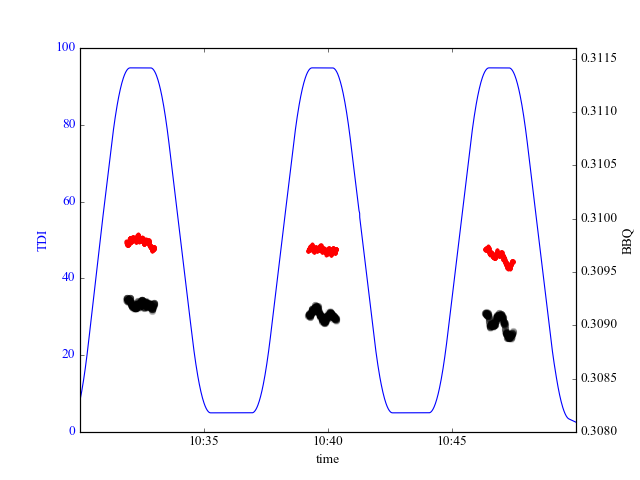

(0.308, 0.3116)

In [25]:
gu=94;
gd=4.992

TDI2.interp_with(BBQ)
BBQ.interp_with(TDI2)
BBQ_RAW.interp_with(TDI2)



mask=(TDI2.values>gu) #| (TDI2.values<gd)

fig, ax1 = plt.subplots()
ax1.plot(TDI2.t_str, TDI2.values, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('TDI', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

ax2 = ax1.twinx()
ax2.plot(np.array(BBQ.t_str)[mask], BBQ.qv[mask], 'ok',alpha=0.1,markerfacecolor='k',markeredgecolor='k')
ax2.plot(np.array(BBQ_RAW.t_str)[mask], BBQ_RAW.qv[mask], 'r.')
ax2.set_ylabel('BBQ', color='k')
for tl in ax2.get_yticklabels():
    tl.set_color('k')
ylim(0.308, 0.3116)


[ True  True  True ..., False False False]


4.43315046095e-05


<IPython.core.display.Javascript object>


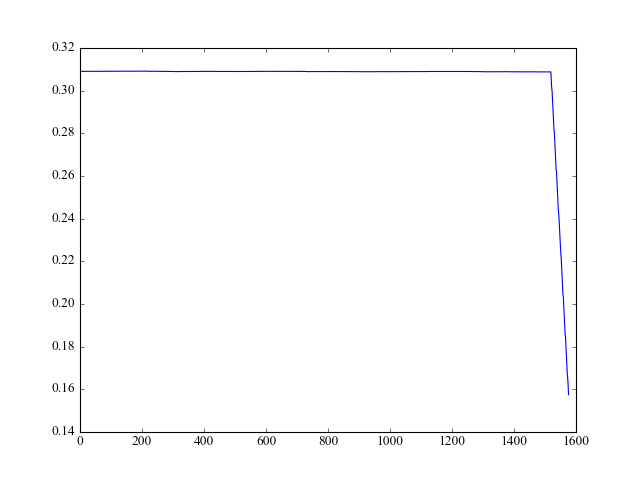

-7.07308641682e-05


<IPython.core.display.Javascript object>


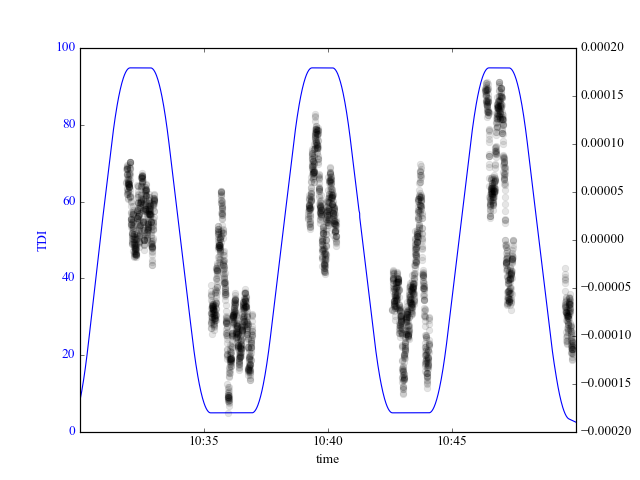

4.4e-05+/-5.1e-05
-7.1e-05+/-4.8e-05
tune shift: 1.2e-04+/-9.9e-05


In [97]:
x=BBQ.t_stamps
y=BBQ.qv

mask_tune=(y<0.31) & (y>0.3)

p=np.polyfit(x[mask_tune],y[mask_tune],1)
slope=p[0]
intercept=p[1]

fit=slope*x+intercept


mask1=(TDI2.values>gu) 

x=BBQ.t_stamps[mask1]
y=BBQ.qv[mask1]
fit1=fit[mask1]

mask_tune=(y<0.31) & (y>0.3)

y1=y-fit1
y1_mean=np.mean(y1[mask_tune])
y1_std=np.std(y1[mask_tune])

print mean(y1[mask_tune])


mask2=(TDI2.values<gd) 

x=BBQ.t_stamps[mask2]
y=BBQ.qv[mask2]

fit2=fit[mask2]

mask_tune=(y<0.31) & (y>0.307)

y2=y-fit2
y2_mean=np.mean(y2[mask_tune])
y2_std=np.std(y2[mask_tune])

figure()
plot(y)
print y2_mean

fig, ax1 = plt.subplots()
ax1.plot(TDI2.t_str, TDI2.values, 'b-')
ax1.set_xlabel('time')
ax1.set_ylabel('TDI', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
xfmt = mpl.dates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(xfmt)

ax2 = ax1.twinx()
ax2.plot(np.array(BBQ.t_str)[mask1], y1, 'ok',alpha=0.1,markerfacecolor='k',markeredgecolor='k')
ax2.plot(np.array(BBQ.t_str)[mask2][mask_tune], y2[mask_tune], 'ok',alpha=.1,markerfacecolor='k',markeredgecolor='k')
# ax2.plot(np.array(BBQ.t_str)[mask], y2, 'ok',alpha=0.1,markerfacecolor='k',markeredgecolor='k')
# ax2.plot(np.array(BBQ_RAW.t_str)[mask], BBQ_RAW.qv[mask], 'r.')
# ax2.plot(np.array(BBQ.t_str),slope*BBQ.t_stamps+intercept)
# ax2.set_ylabel('BBQ', color='k')
# for tl in ax2.get_yticklabels():
#     tl.set_color('k')
# ylim(0.308, 0.3116)

ts_mean=y1_mean- y2_mean
ts_std=y1_std+y2_std

print '%.1e+/-%.1e'%(y1_mean,y1_std)
print '%.1e+/-%.1e'%(y2_mean,y2_std)
print 'tune shift: %.1e+/-%.1e'%(ts_mean,ts_std)